<a href="https://colab.research.google.com/github/aparna-2001/medical-insurance-charges-ML-model-2021-2025/blob/main/medical_insurance_charges_ML_model_2021_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data**



*   [Medical Insurance Charges (2021–2025) Enhanced](https://www.kaggle.com/datasets/ibrahimshahrukh/medical-insurance-cost-dataset-usa)



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split


**DATA LOADING**

In [ ]:
medical_df = pd.read_csv('medical_insurance_2026_kaggle.csv')

In [ ]:
pd.set_option('display.max_columns', None)

medical_df.head()

,record_date,year,quarter,age,age_group,sex,sex_female,bmi,bmi_category,children,smoker,smoker_flag,is_high_risk,risk_score,region,region_northeast,region_northwest,region_southeast,region_southwest,charges,monthly_premium_est,charges_per_child,insurance_tier,bmi_age_interaction
0,2024-02-01,2024,1,19,Young Adult (18-25),female,1,27.90,Overweight,0,yes,1,1,5.35,southwest,0,0,0,1,16884.92,1407.08,0.00,Platinum,530.10
1,2024-12-30,2024,4,18,Young Adult (18-25),male,0,33.77,Obese Class I,1,no,0,1,1.40,southeast,0,0,1,0,1725.55,143.80,1725.55,Bronze,607.86
2,2023-05-11,2023,2,28,Adult (26-35),male,0,33.00,Obese Class I,3,no,0,1,2.18,southeast,0,0,1,0,4449.46,370.79,1483.15,Silver,924.00
3,2024-07-18,2024,3,33,Adult (26-35),male,0,22.70,Normal Weight,0,no,0,0,1.11,northwest,0,1,0,0,21984.47,1832.04,0.00,Diamond,749.10
4,2024-02-05,2024,1,32,Adult (26-35),male,0,28.88,Overweight,0,no,0,0,1.48,northwest,0,1,0,0,3866.86,322.24,0.00,Bronze,924.16


In [ ]:
medical_df.tail()

,record_date,year,quarter,age,age_group,sex,sex_female,bmi,bmi_category,children,smoker,smoker_flag,is_high_risk,risk_score,region,region_northeast,region_northwest,region_southeast,region_southwest,charges,monthly_premium_est,charges_per_child,insurance_tier,bmi_age_interaction
1332,2025-06-28,2025,2,50,Senior-Middle (46-55),male,0,30.97,Obese Class I,3,no,0,1,3.00,northwest,0,1,0,0,10600.55,883.38,3533.52,Gold,1548.50
1333,2021-04-14,2021,2,18,Young Adult (18-25),female,1,31.92,Obese Class I,0,no,0,1,1.07,northeast,1,0,0,0,2205.98,183.83,0.00,Bronze,574.56
1334,2023-11-29,2023,4,18,Young Adult (18-25),female,1,36.85,Obese Class II,0,no,0,1,1.41,southeast,0,0,1,0,1629.83,135.82,0.00,Bronze,663.30
1335,2021-07-17,2021,3,21,Young Adult (18-25),female,1,25.80,Overweight,0,no,0,0,0.79,southwest,0,0,0,1,2007.94,167.33,0.00,Bronze,541.80
1336,2025-07-28,2025,3,61,Senior (56+),female,1,29.07,Overweight,0,yes,1,1,7.25,northwest,0,1,0,0,29141.36,2428.45,0.00,Diamond,1773.27


In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   record_date          1337 non-null   object 
 1   year                 1337 non-null   int64  
 2   quarter              1337 non-null   int64  
 3   age                  1337 non-null   int64  
 4   age_group            1337 non-null   object 
 5   sex                  1337 non-null   object 
 6   sex_female           1337 non-null   int64  
 7   bmi                  1337 non-null   float64
 8   bmi_category         1337 non-null   object 
 9   children             1337 non-null   int64  
 10  smoker               1337 non-null   object 
 11  smoker_flag          1337 non-null   int64  
 12  is_high_risk         1337 non-null   int64  
 13  risk_score           1337 non-null   float64
 14  region               1337 non-null   object 
 15  region_northeast     1337 non-null   i

In [ ]:
medical_df.shape

(1337, 24)

In [ ]:
list(medical_df.columns)

['record_date',
 'year',
 'quarter',
 'age',
 'age_group',
 'sex',
 'sex_female',
 'bmi',
 'bmi_category',
 'children',
 'smoker',
 'smoker_flag',
 'is_high_risk',
 'risk_score',
 'region',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest',
 'charges',
 'monthly_premium_est',
 'charges_per_child',
 'insurance_tier',
 'bmi_age_interaction']

In [ ]:
medical_df.describe()

,year,quarter,age,sex_female,bmi,children,smoker_flag,is_high_risk,risk_score,region_northeast,region_northwest,region_southeast,region_southwest,charges,monthly_premium_est,charges_per_child,bmi_age_interaction
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,2023.036649,2.477936,39.222139,0.495138,30.663628,1.095737,0.204936,0.624533,3.052939,0.242334,0.242334,0.272251,0.243082,13279.121503,1106.593328,5127.538257,1212.054233
std,1.384042,1.121910,14.044333,0.500163,6.100233,1.205571,0.403806,0.484425,1.981412,0.428655,0.428655,0.445285,0.429104,12110.359677,1009.196560,8357.618626,522.515951
min,2021.000000,1.000000,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.870000,93.490000,0.000000,287.280000
25%,2022.000000,1.000000,27.000000,0.000000,26.290000,0.000000,0.000000,0.000000,1.690000,0.000000,0.000000,0.000000,0.000000,4746.340000,395.530000,0.000000,765.700000
50%,2023.000000,2.000000,39.000000,0.000000,30.400000,1.000000,0.000000,1.000000,2.480000,0.000000,0.000000,0.000000,0.000000,9386.160000,782.180000,2174.730000,1154.400000
75%,2024.000000,4.000000,51.000000,1.000000,34.700000,2.000000,0.000000,1.000000,3.410000,0.000000,0.000000,1.000000,0.000000,16657.720000,1388.140000,6399.980000,1589.280000
max,2025.000000,4.000000,64.000000,1.000000,53.130000,5.000000,1.000000,1.000000,8.320000,1.000000,1.000000,1.000000,1.000000,63770.430000,5314.200000,58571.070000,2845.480000


In [ ]:
info = pd.DataFrame({
    'dtype': medical_df.dtypes,
    'non_null': medical_df.notnull().sum(),
    'missing': medical_df.isnull().sum(),
    'missing_%': (medical_df.isnull().mean()*100).round(2),
    'nunique': medical_df.nunique()
})
print(info.to_string())

                       dtype  non_null  missing  missing_%  nunique
record_date           object      1337        0        0.0      932
year                   int64      1337        0        0.0        5
quarter                int64      1337        0        0.0        4
age                    int64      1337        0        0.0       47
age_group             object      1337        0        0.0        5
sex                   object      1337        0        0.0        2
sex_female             int64      1337        0        0.0        2
bmi                  float64      1337        0        0.0      528
bmi_category          object      1337        0        0.0        6
children               int64      1337        0        0.0        6
smoker                object      1337        0        0.0        2
smoker_flag            int64      1337        0        0.0        2
is_high_risk           int64      1337        0        0.0        2
risk_score           float64      1337        0 

In [ ]:
print('Target variable describe')

medical_df['charges'].describe()

Target variable describe


,charges
count,1337.000000
mean,13279.121503
std,12110.359677
min,1121.870000
25%,4746.340000
50%,9386.160000
75%,16657.720000
max,63770.430000


**EXPLORATORY DATA ANALYSIS**

Target variabe feature Idenitification


<Axes: xlabel='charges', ylabel='Count'>

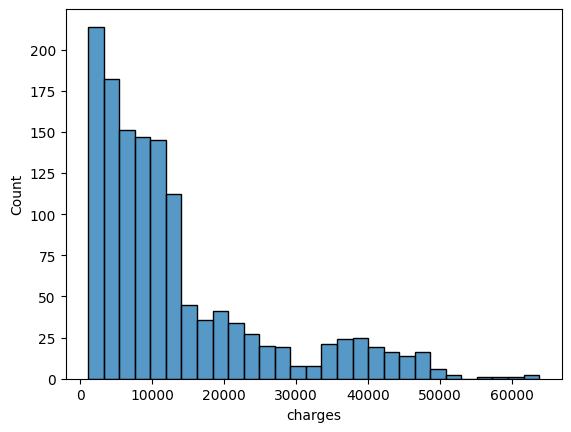

In [ ]:
print('Target variabe feature Idenitification')

sn.histplot(medical_df['charges'])


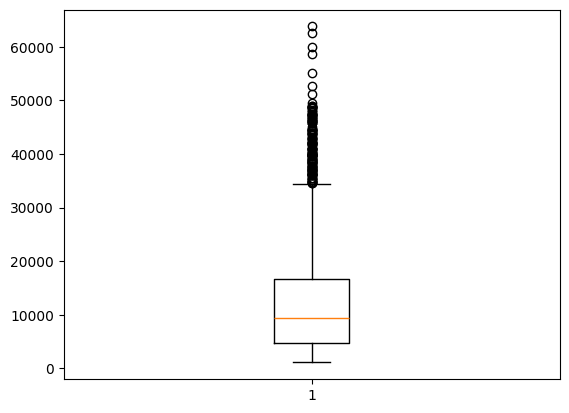

In [53]:
box = plt.boxplot(medical_df['charges'])

In [60]:
min, max = [item.get_ydata()[0] for item in box['caps']]
print(f'The minimum values of distribution: {min}')
print(f'The maximum values of distribution: {max}')

The minimum values of distribution: 1121.87
The maximum values of distribution: 34472.84


In [61]:
q1, q3= [item.get_ydata()[0] for item in box['whiskers']]
print(f'The first quartile of distribution: {q1}')
print(f'The third quartile of distribution: {q3}')

The first quartile of distribution: 4746.34
The third quartile of distribution: 16657.72


In [64]:
inter_quartile_range = q3 - q1
print(f'The inter quartile range of distribution: {inter_quartile_range}')

The inter quartile range of distribution: 11911.380000000001


In [66]:
lower_bound = q1 - (1.5 * inter_quartile_range)
upper_bound = q3 + (1.5 * inter_quartile_range)

print(f'The lower bound of distribution: {lower_bound}')
print(f'The upper bound of distribution: {upper_bound}')

The lower bound of distribution: -13120.73
The upper bound of distribution: 34524.79


* The lower bound is effectively $0

* The upper bound is $34524.79

* That upper bound perfectly matches your cap of $34,472, confirming everything above that is a statistical outlier

In [74]:
higher_claims = medical_df[medical_df['charges'] > upper_bound]

Index(['record_date', 'year', 'quarter', 'age', 'age_group', 'sex',
       'sex_female', 'bmi', 'bmi_category', 'children', 'smoker',
       'smoker_flag', 'is_high_risk', 'risk_score', 'region',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'charges', 'monthly_premium_est',
       'charges_per_child', 'insurance_tier', 'bmi_age_interaction'],
      dtype='object')

* The charges are right skewed

* The median charges are around $10000

* 75 percentage of people pay above $10000

* The minimum value is 1121.87 and maximum value is 34472.84

*
